<h1>Handwritten Code Classification using NeuralNetwork

In [22]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [23]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

<h3>Divide by 255 to get values between 0 to 1 as scaling improves accuracy.(0-255) is the range of values for colours<h3>

In [24]:
X_train = X_train / 255
X_test = X_test / 255


<h3>Convert from 3d to 2d<h3>

In [25]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

<h3>From here we try to train our model and improve its accuracy with each try<h3>

In [26]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 909us/step - loss: 0.4656 - accuracy: 0.8797
Epoch 2/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.3034 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 2s 825us/step - loss: 0.2833 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 811us/step - loss: 0.2733 - accuracy: 0.9228
Epoch 5/5
1875/1875 [==============================] - 2s 801us/step - loss: 0.2663 - accuracy: 0.9264


In [27]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2678 - accuracy: 0.9253


[0.26778751611709595, 0.9253000020980835]

In [28]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 762us/step


array([5.2719157e-02, 4.0407019e-07, 5.3400941e-02, 9.6440887e-01,
       2.2287883e-03, 1.4375277e-01, 2.1223987e-06, 9.9978852e-01,
       9.0622522e-02, 6.5353006e-01], dtype=float32)

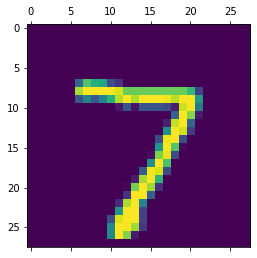

In [29]:
plt.matshow(X_test[0])

In [30]:
np.argmax(y_predicted[0])

7

In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [32]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(69.0, 0.5, 'Truth')

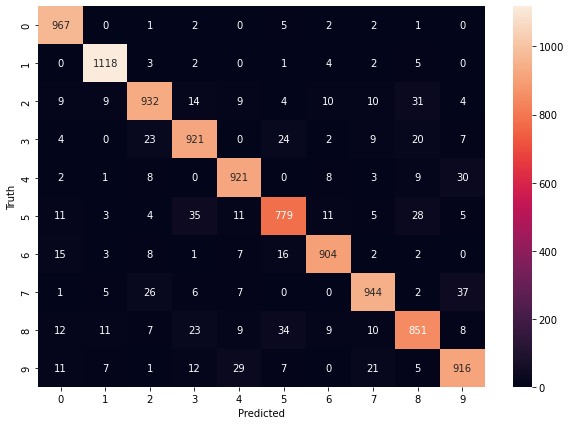

In [34]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2723 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1200 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0841 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0635 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0503 - accuracy: 0.9847


In [36]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0874 - accuracy: 0.9730


[0.08744729310274124, 0.9729999899864197]

313/313 [==============================] - 0s 833us/step


Text(69.0, 0.5, 'Truth')

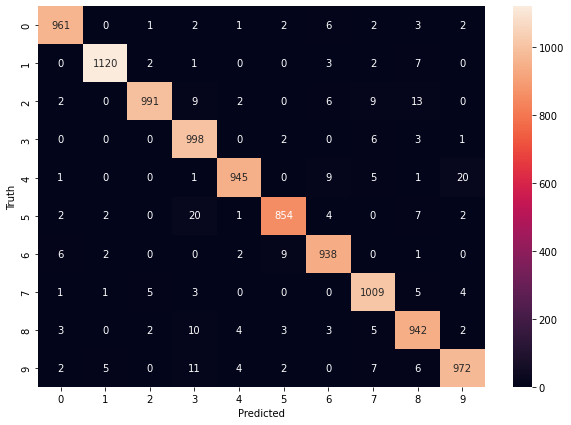

In [37]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2735 - accuracy: 0.9221
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1215 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0835 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0643 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0502 - accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0412 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0321 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0262 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0230 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.017

In [39]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0897 - accuracy: 0.9752


[0.08965684473514557, 0.9751999974250793]

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2841 - accuracy: 0.9203
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1275 - accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0883 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0669 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0521 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0417 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0345 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0286 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0236 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

In [44]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9788


[0.07678458839654922, 0.9787999987602234]

In [47]:
model = keras.Sequential([
          keras.layers.Flatten(input_shape=(28, 28)),
          keras.layers.Dense(100,activation='relu'),
          keras.layers.Dense(10,activation='sigmoid')                

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2682 - accuracy: 0.9252
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1220 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0841 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0642 - accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0526 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0414 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0341 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0271 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0236 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

In [48]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 843us/step - loss: 0.0787 - accuracy: 0.9761


[0.07874239236116409, 0.9761000275611877]

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2686 - accuracy: 0.9231
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1160 - accuracy: 0.9656
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0807 - accuracy: 0.9758
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0619 - accuracy: 0.9813
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0493 - accuracy: 0.9850
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0405 - accuracy: 0.9872
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0325 - accuracy: 0.9902
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0278 - accuracy: 0.9915
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0223 - accuracy: 0.9929
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - l

In [52]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2071 - accuracy: 0.9797


[0.20714396238327026, 0.9797000288963318]